In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [2]:
raw_data = pd.read_csv('data/Admittance.csv')
raw_data.head(3)

,SAT,Admitted
0,1363,No
1,1792,Yes
2,1954,Yes


In [3]:
data = raw_data.copy()
data.Admitted.unique()

array(['No', 'Yes'], dtype=object)

In [4]:
data.Admitted = data.Admitted.map({'No':0, 'Yes':1})
data.head(3)

,SAT,Admitted
0,1363,0
1,1792,1
2,1954,1


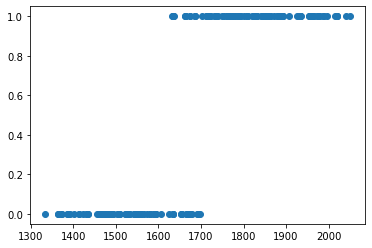

In [5]:
plt.scatter(data.SAT, data.Admitted)

In [21]:
y = data.Admitted
ox = data.SAT
x = sm.add_constant(ox)
result = sm.OLS(y,x).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Admitted   R-squared:                       0.683
Model:                            OLS   Adj. R-squared:                  0.681
Method:                 Least Squares   F-statistic:                     357.5
Date:                Fri, 29 Jan 2021   Prob (F-statistic):           2.98e-43
Time:                        14:27:30   Log-Likelihood:                -24.262
No. Observations:                 168   AIC:                             52.52
Df Residuals:                     166   BIC:                             58.77
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.2519      0.203    -16.038      0.000      -3.652      -2.852
SAT            0.0022      0.000     18.907      0.000       0.002       0.002
==============================================================================
Omnibus:                        7.929   Durbin-Watson:                   1.869
Prob(Omnibus):                  0.019   Jarque-Bera (JB):                3.844
Skew:                           0.090   Prob(JB):                        0.146
Kurtosis:                       2.281   Cond. No.                     1.59e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.59e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

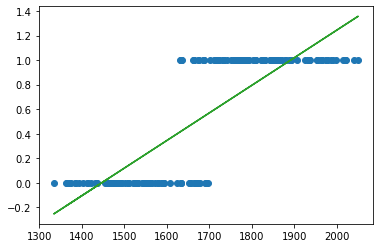

In [20]:
# R-square가 높아도 좋은 방법이 아님
plt.scatter(ox, y, color='C0')
yhat = result.params[0] + ox*result.params[1]
plt.plot(ox, yhat, color='C2')

In [11]:
result = sm.Logit(y,x).fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.137766
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Admitted   No. Observations:                  168
Model:                          Logit   Df Residuals:                      166
Method:                           MLE   Df Model:                            1
Date:                Fri, 29 Jan 2021   Pseudo R-squ.:                  0.7992
Time:                        13:46:50   Log-Likelihood:                -23.145
converged:                       True   LL-Null:                       -115.26
Covariance Type:            nonrobust   LLR p-value:                 5.805e-42
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -69.9128     15.737     -4.443      0.000    -100.756     -39.070
SAT            0.0420      0.009      4.454      0.000       0.024       0.060
==============================================================================

Possibly complete quasi-separation: A fraction 0.27 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

##### y = logit(p) = log(p/(1-p)) = -69.9128 + 0.0420*SAT

## Z = b0 + b1x = logit(p) = log(p/(1-p))
## e(b0 + b1*x) / (1 + e(b0+b1*x))

In [12]:
def logitToY(x, b0, b1):
    return np.array(np.exp(b0+b1*x)/(1+np.exp(b0+b1*x)))

In [14]:
y_sorted = np.sort(logitToY(data.SAT, result.params[0], result.params[1]))
x_sorted = np.sort(np.array(data.SAT))

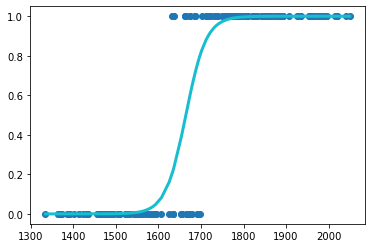

In [16]:
plt.scatter(data.SAT, y, color='C0')
plt.plot(x_sorted, y_sorted, color='C9', lw='3')

In [17]:
result.predict(x)

0      0.000003
1      0.995321
2      0.999995
3      0.382546
4      0.047469
         ...   
163    0.918308
164    0.973292
165    0.009999
166    0.002739
167    0.000195
Length: 168, dtype: float64

In [22]:
yhat = result.predict(x)
prediction = list(map(round,yhat))
print(prediction)

[0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0]


In [26]:
testdf = pd.DataFrame({'y':y, 'yhat':pd.Series(prediction)})
testdf.head()

,y,yhat
0,0,0
1,1,1
2,1,1
3,0,0
4,0,0


In [29]:
(testdf.y == testdf.yhat).sum(), len(testdf)

(155, 168)